<a href="https://colab.research.google.com/github/asrenninger/urbansim/blob/main/miscellany/renewables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Renewable Energy Forecasting Workshop - In-Class Tutorial**
- **Date**: December 12th 2024
- **Authors**: meriem.mehri.24@ucl.ac.uk | andrew.renninger.12@ucl.ac.uk

### **Introduction**

#### **Overview**
This tutorial explores advanced methods for forecasting renewable energy production, with a particular focus on solar and wind energy. These sources have demonstrated rapid growth, often exceeding the projections made by expert models. Understanding and improving these forecasts is critical for informed decision-making in energy planning.

Students will engage in hands-on activities to evaluate forecasting methods, utilizing historical data to assess the accuracy of expert predictions. The tutorial emphasizes the significance of objective, data-driven approaches, such as the **Geometric Random Walk with Drift (GRWD)**, which serves as a robust baseline for evaluating expert forecasts. This systematic approach aims to highlight both the challenges and opportunities in renewable energy forecasting.

#### **Learning objectives**
By the end of this workshop, students will be able to:
- **(a)** Understand the principles behind renewable energy forecasting and its importance in energy planning.
- **(b)** Work with data from the U.S. Energy Information Administration (EIA), including historical and forecasted energy data.
- **(c)** Evaluate forecasting models by computing and visualizing errors, comparing expert predictions to statistical baselines like GRWD.
- **(d)** Implement forecasting techniques using Python to model renewable energy trends and assess prediction accuracy.
- **(e)** Gain insights into the limitations of forecasting models and strategies to improve predictability.

#### **About the AEO Data**
The **Annual Energy Outlook (AEO)**, published by the U.S. Energy Information Administration (EIA), provides projections of energy production, consumption, and trends in the United States. It is an invaluable resource for understanding historical energy patterns and guiding future planning. Key features of the AEO data:
- Includes **historical records** of energy production, such as solar and wind capacity.
- Provides **expert predictions** for future energy production under various scenarios (e.g., reference, high-growth cases).
- Offers granular insights into energy trends across sectors like electric power and end-use.

You can access the **`AEO data`**  at [AEO Data](https://www.eia.gov/outlooks/aeo/tables_ref.php).

#### **Historical perspective**
- Expert models have historically **underpredicted the rapid growth** of renewable energies, particularly in solar and wind.
- Comparing historical predictions to realized outcomes reveals biases and highlights the need for robust, data-driven forecasting methods.

This workshop aims to examine historical records of solar and wind energy growth, analyzes forecasts generated by experts along with the assumptions underpinning them, and evaluates the performance of baseline models like the Geometric Random Walk with Drift (GRWD) in predicting renewable energy trends. By leveraging these resources and methodologies, students will develop a deeper understanding of renewable energy forecasting and gain the tools needed to critically assess prediction accuracy.

#### **Initial Imports**

In [1]:
!wget https://github.com/asrenninger/urbansim/raw/refs/heads/main/miscellany/renewables.zip
!unzip renewables.zip

--2024-12-12 10:49:53--  https://github.com/asrenninger/urbansim/raw/refs/heads/main/miscellany/renewables.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/asrenninger/urbansim/refs/heads/main/miscellany/renewables.zip [following]
--2024-12-12 10:49:54--  https://raw.githubusercontent.com/asrenninger/urbansim/refs/heads/main/miscellany/renewables.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16654280 (16M) [application/zip]
Saving to: ‘renewables.zip’

renewables.zip      100%[===================>]  15.88M  --.-KB/s    in 0.1s    

2024-12-12 10:49:54 (159 MB/s) - ‘renewables.zip’ saved

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import sys
sys.path.append('/content/renewables/')

In [4]:
# import os
# os.chdir('/content/drive/MyDrive/renewables/')

In [5]:
import glob # used for finding files matching a specific pattern
import py_compile # used to compile Python scripts into .pyc bytecode files
import pandas as pd # used for data manipulation and analysis
import numpy as np # used for numerical computations & operations
import make_forecasts as mf # custom module for generating forecasts
import make_errors as me # custom module for calculating and visualizing errors between forecasts and actual data
import matplotlib.pyplot as plt # used for creating plots and visualizations
import matplotlib.gridspec as gridspec # used for fine control over subplot layouts in matplotlib

### **1. Downloading & Preparing EIA Data**

**Background & context:** The U.S. Energy Information Administration (EIA) provides comprehensive datasets on the electric power industry, offering valuable insights into power generation, operations, environmental controls, and forecasts. These datasets capture trends by state, source, and time period, making them essential for analyzing historical patterns and understanding future energy needs. They serve as critical inputs for evaluating forecasting methods, highlighting discrepancies between predictions and actual outcomes. To support accessibility, the EIA offers tools such as detailed explanations and visualizations that facilitate the exploration of complex data. By organizing and converting these datasets for compatibility, students can focus on analyzing renewable energy trends, assessing forecast performance, and gaining a deeper understanding of the broader context of electricity generation in the United States.

##### **Downloading the data**
The EIA electricity data can be accessed at [EIA Electric Power Data](https://www.eia.gov/electricity/data/state/). Here's how to navigate and make the most of the resources available:

**Overview of available data**
   - The EIA collects non-confidential data due to the regulatory history of the electric power industry.
   - The datasets cover a variety of topics:
     - **Power Plant Characteristics** (Form EIA-860).
     - **Operational Data** (Form EIA-923).
     - **Environmental Controls and Emissions Estimates**.
     - **Retail Sales by Utilities and Power Marketers** (Form EIA-861).
     - **Hourly Electricity Demand and Forecasts** (Form EIA-930).
     - **Small-Scale Solar PV Generation Estimates**.
     - **Electricity Imports and Exports** (Form EIA-111).
     - **Reliability Information** (Form EIA-411).
     - **Forecasts for the Future of the Electricity Industry**.

**Steps to download**
   - Visit the [Electric Power Data](https://www.eia.gov/electricity/data/state/) page.
   - Browse or search for the dataset relevant to your analysis (e.g., state-level electricity generation or hourly demand).
   - Download the data files, which are typically provided in **`Excel (.xls/.xlsx)`** or **`CSV format`**.
   - If needed, explore additional instructions and details provided in accompanying documentation or within ZIP folders.

**Using aggregated data**: Aggregated datasets are available in Excel format and include historical and recent data. Interactive web applications on the site allow to visualize data trends and generate custom queries.

##### **Preparing the data**

| Step                      | Description                                                                                         |
|---------------------------|-----------------------------------------------------------------------------------------------------|
| **1. Pre-downloading files** | Download all relevant data up to **2019** as well as the **2020 to 2023** timeframe, *if available*. |
| **2. Converting data to CSV**| Convert Excel files to **CSV** format for easier processing and compatibility with Python tools.    |
| **3. Using Python for conversion** | Use the provided Python script to automate the conversion of Excel files to CSV format.            |
| **4. Organizing data**       | Clearly name all files and store them in a well-structured directory (data folder). |

#### **Processing AEO data: `Excel` to `CSV` conversion**

In this section, we will automate the process of converting Annual Energy Outlook (AEO) Excel files into CSV format, making the data more accessible and easier to work with for analysis. This step is crucial for preparing the data for modeling and evaluation, as it ensures compatibility with Python-based tools and workflows. By extracting data from each sheet in the Excel files, we will generate individual CSV files for both historical capacity data and expert forecast data.

**Key steps include:**
- Identifying and loading relevant AEO Excel files, such as historical and forecast data.
- Extracting data from each sheet corresponding to specific years.
- Saving the processed data into well-structured CSV files for efficient analysis.

**(1) Note:** This script defines key variables like file paths, data types (e.g., "ElectricPower" or "End-Use"), and the years of interest. The resulting CSV files will form the foundation for subsequent analyses and modeling tasks.

*For participants who were unable to successfully download the data, it has been provided in a separate folder included with the workshop materials to ensure you can follow along seamlessly.*

In [6]:
import os
os.chdir('/content/renewables/')

In [7]:
'''
AEO_data_from_excel_to_csv converts the Excel files into CSV files (each sheet to one file).

Global variables:
    path (str): Path to data folder
    sector (str): "ElectricPower" or "End-Use"
    projection_of (str): "Generation Capacity" or "Generation"
    name_expert_csv_files (str): File name where CSV files are saved
    year_start (int): Year for which we have the first AEO report data
    year_end (int): Year for which we have the last AEO report data
'''

# Global variables
path = 'AEOData/'
sector = "ElectricPower"
projection_of = "Capacity"
expert_forecast_cap_data = glob.glob(f"{path}/*{projection_of}.xls")
historical_cap_data = glob.glob(f"{path}/*{projection_of}Historical.xls")
name_expert_csv_files = f"{path}AEOData_{sector}_{projection_of}"
year_start = 2003
year_end = 2018  # Python `range` end is exclusive, so +1 is accounted for here.

In [8]:
# Process historical capacity data
if historical_cap_data:
    df_hist_aeo_cap = pd.read_excel(historical_cap_data[0])
    historical_csv_name = historical_cap_data[0].replace('.xls', '.csv')
    df_hist_aeo_cap.to_csv(historical_csv_name, sep=',', encoding='utf-8', index=False)

In [9]:
# Process expert forecast capacity data
df_check = []
for year in range(year_start, year_end):
    try:
        df = pd.read_excel(expert_forecast_cap_data[0], sheet_name=str(year))
        df_check.append(df)
        forecast_csv_name = f"{name_expert_csv_files}_{year}.csv"
        df.to_csv(forecast_csv_name, sep=',', encoding='utf-8', index=False)
    except ValueError as e:
        print(f"Error processing sheet for year {year}: {e}")

Sample data:
Unnamed: 0  Conventional Hydropower  Geothermal  Municipal Solid Waste  \
1994                      78.203865    2.971582               3.035167   
1995                      78.480041    2.971582               2.433843   
1996                      78.584999    3.017142               2.908247   
1997                      77.598351    3.003882               3.408406   
1998                      77.711182    2.885237               2.492354   

Unnamed: 0  Wood and Other Biomass  Solar Thermal  Solar Photovoltaic  \
1994                      1.707142        0.35370             0.01051   
1995                      1.861213        0.36370             0.01151   
1996                      1.905252        0.36370             0.01051   
1997                      1.664081        0.35370             0.01242   
1998                      1.764613        0.33151             0.01271   

Unnamed: 0      Wind      Total  
1994        1.785162  88.067131  
1995        1.828262  87.950157  
1

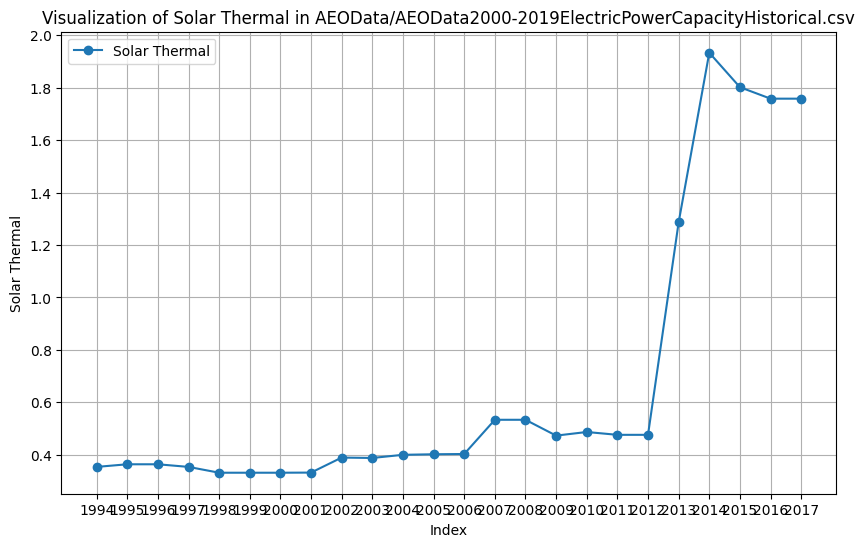

In [10]:
# (Optional) Visualize the data from the processed CSV files
# Define a function to visualize a sample dataset
def visualize_csv_data(csv_file, column_to_plot=None):
    # Load the CSV file
    df = pd.read_csv(csv_file, index_col=0)
    df = df.transpose()

    # Display the first few rows of the dataset
    print("Sample data:")
    print(df.head())

    # Plot the data if a column is specified
    if column_to_plot and column_to_plot in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df[column_to_plot], label=column_to_plot, marker='o')
        plt.title(f"Visualization of {column_to_plot} in {csv_file}")
        plt.xlabel("Index")
        plt.ylabel(column_to_plot)
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print(f"Column '{column_to_plot}' not found in {csv_file}. Please check the column name.")

# Example usage: Replace 'historical_csv_name' with the path to a processed CSV file
# Replace 'ColumnName' with the column you want to visualize
if historical_cap_data:
    visualize_csv_data(historical_csv_name, column_to_plot='Solar Thermal')  # Update 'ColumnName' with an actual column

### **2. Evaluating EIA Predictions: Forecasts vs. Reality**

In this section, we focus on analyzing the accuracy of historical energy forecasts by comparing **EIA expert predictions** to **realized outcomes**. This process allows us to identify trends, biases, and areas for improvement in energy forecasting. By incorporating visualizations, we will highlight discrepancies between predictions and actual outcomes, showcasing the lessons learned from past projections.

**Breakdown of what we'll be considering/assessing:**

**Historical data**:
- Load historical energy production data from the Annual Energy Outlook (AEO) database.
- Use this data as a benchmark for evaluating the accuracy of forecasts.

**EIA forecasts**:
- Extract and prepare expert predictions for renewable energy production, such as solar and wind capacity, from the EIA datasets.
- Save these forecasts in a structured format for comparison.

**Comparison & visualization**:
- Compare expert forecasts to actual outcomes, highlighting over- or underpredictions.
- Incorporate **statistical baselines**, such as GRWD (Geometric Random Walk with Drift), to provide an objective reference point for evaluating forecast performance.


#### **Visualizing EIA predictions vs. reality**
To better understand the performance of past forecasts, we will create visualizations that plot:
- **Realized outcomes** (blue line in the graph): Actual renewable energy production over time, based on historical data.
- **Expert predictions** (green line in the graph): EIA’s forecasts for renewable energy growth in past reports.
- **Optional baselines** (red line in the graph): Statistical models, like GRWD, offering alternative forecasts.

Below is an example visualization of solar photovoltaic forecasts for \(M = 5):

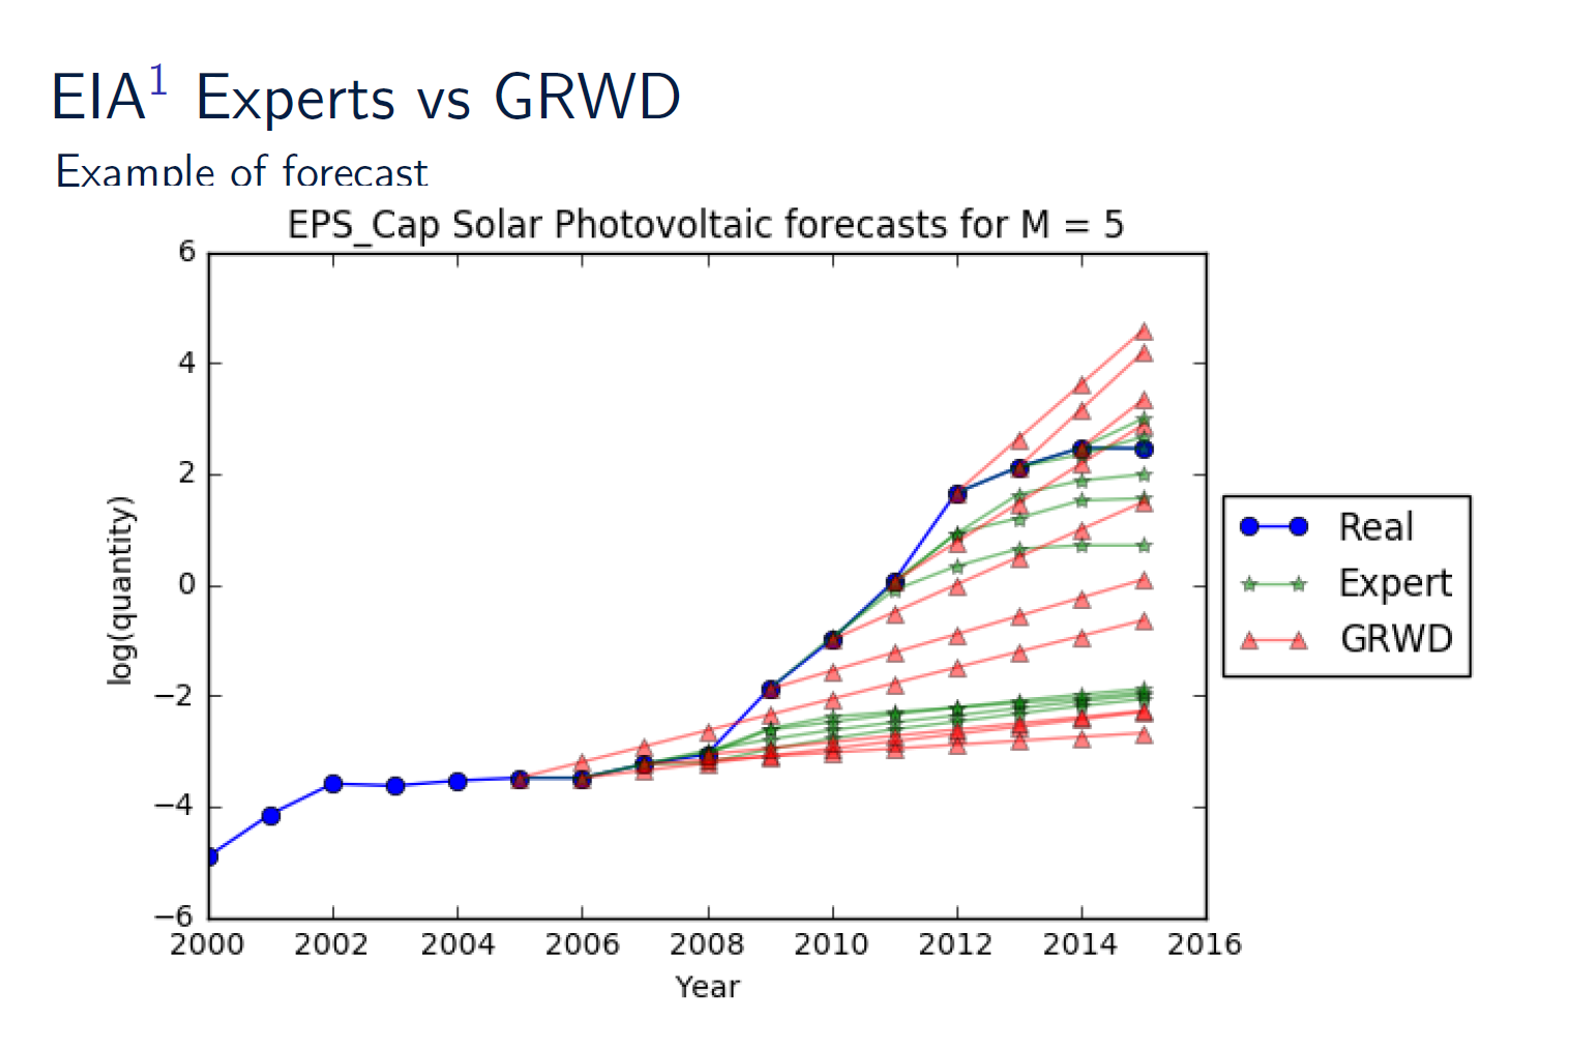

**Key observations**: The graph demonstrates a persistent pattern where **EIA expert forecasts consistently underpredict actual growth** in renewable energy, especially for solar and wind technologies. Despite its simplicity, the GRWD baseline often performs better in capturing the trajectory of renewable energy growth, suggesting room for improvement in expert methodologies. These comparisons emphasize the importance of critically evaluating assumptions embedded in forecasting models.



##### **Why does this matter?**
The **forecast vs. reality analysis** is essential for understanding the limitations of energy forecasting and identifying opportunities for improvement. By reflecting on historical biases, such as the tendency for underprediction, we can work towards developing more robust and accurate forecasting methods that better support energy policy and decision-making.

This analysis sets the foundation for further exploration of forecasting methodologies and their role in shaping our understanding of renewable energy trends.

In [11]:
'''
run_forecasts performs the geometric random walk with drift forecast.

Global variables:
    path (str): Path to data folder
    sector (str): "ElectricPower" or "End-Use"
    projection_of (str): "Generation Capacity" or "Generation"
    name_grwd_csv_files (str): File name where CSV files are saved
    year_first_data_point (int): Year for the first historical data point
    year_last_data_point (int): Year for the last historical data point
    year_first_report (int): Year of the first AEO report available
    year_last_report (int): Year of the last AEO report available
'''

# Global variables
path = 'AEOData/'
sector = "ElectricPower"
projection_of = "Capacity"
case = ""  # Options: "_HighEconGrowth", "_HighOilPrices", or "" for reference case
sec_proj = f"EPS_Cap{case}"
expert_forecast_data = glob.glob(f"{path}/*{projection_of}{case}.xls")
historical_data = glob.glob(f"{path}/*{projection_of}Historical.xls")
results_path = "results/forecast/"

# Load historical data
if not historical_data:
    raise FileNotFoundError("No historical data files found. Please check the path.")
df_hist_aeo = pd.read_excel(historical_data[0])

In [12]:
# Parameters
M = 22  # Number of points for the geometric random walk
time_lag = 3
year_first_data_point = 1994
year_last_data_point = 2017
year_last_report = 2019

In [13]:
# Forecasting range
year_start_grwd_forecasting = year_first_data_point + M
year_end_grwd_forecasting = year_last_report - time_lag + 1

In [14]:
def mu_k_hat(quantity):
    '''
    Computes mean and standard deviation of the log of data
    Args:
        quantity(list): list of data
    Returns:
        mu (float): mean
        np.sqrt(k)(float): standard deviation
    '''
    log_prices = np.log(quantity)
    m = len(quantity) - 1 #since the actual data points are differences
    k = 0
    mu = float(log_prices[-1] - log_prices[0])/m
    for i in range(m):
        k += (log_prices[i + 1] - log_prices[i] - mu)**2
    k = k/float(m - 1)
    return mu, np.sqrt(k)

def save_mu_k_and_forecast(year_make_forecast, df, year_end_forecast=2015, \
                           year_data_starts=2000, file_name="EPS_Cap", \
                           save_path=results_path):
    '''
    For a given year makes the geometric random walk with drift forcast
    considering Moore's Law. Results are the paremeters Mu and K, and the
    forecasts for the following years. Everything is saved in csv file.
    Args:
        year_of_forecast(int): year forecast would be made
        df(DataFrame): pandas dataframe with the historical data
        year_end_forecat(int): until which year to forecast
        year_data_starts(int): first year of data
        file_name (str): part of the file name to which the results are exported
        save_path(str): folder path to which results are exported
    Returns:
        None
    '''
    m = year_make_forecast - year_data_starts
    last_data_point = year_make_forecast
    new_df = df[[i for i in range(year_data_starts, last_data_point + 1)]]
    #+1 is to include last_data_point
    data_points = len([i for i in range(year_data_starts, last_data_point + 1)])
    print("data start ", year_data_starts)
    print("data end ", last_data_point + 1)

    print(save_path + file_name + "_forecast_" + str(year_make_forecast) + "_M" \
          + str(m) +".csv")
    f_forecast = open(save_path + file_name + "_forecast_" + \
                      str(year_make_forecast) + "_M" + str(m) + ".csv","w")
    f_mu = open(save_path + file_name + "_Mu_" + str(year_make_forecast) + \
                "_M" + str(m) + ".csv" ,"w")
    f_k = open(save_path + file_name + "_K_" + str(year_make_forecast) + \
               "_M" + str(m) + ".csv" ,"w")

    for name in new_df.index:
        f_forecast.write("," + str(name))
        f_mu.write(str(name) + ",")
        f_k.write(str(name) + ",")

    f_forecast.write("\n")
    f_mu.write("\n")
    f_k.write("\n")

    for name in new_df.index: #Start forecasting and writing data
        quantity = list(new_df.loc[name])
        mu, k = mu_k_hat(quantity)
        f_mu.write(str(mu) + ",")
        f_k.write(str(k) + ",")

        if name == "Solar Photovoltaic":
            print(name, " ", k)
            print("data points = ", quantity)

    years_to_forecast = range(last_data_point, year_end_forecast + 1)
    #Note tau = 0 is included, to exclude to +1 in first part
    #+1 to include year_end_forecast in the list

    for y in years_to_forecast:
        f_forecast.write(str(y))
        for name in new_df.index: #iterate over each technology name
            f_forecast.write(",")
            quantity = list(new_df.loc[name])
            mu, k = mu_k_hat(quantity)
            starting_value = df[last_data_point].loc[name] #Start form our last
            # data point
            forecast_value = np.log(starting_value) + mu * (y - last_data_point)
            f_forecast.write(str(np.exp(forecast_value)) )
            #Forecast for real value, not log value

        f_forecast.write("\n")

    f_mu.close()
    f_k.close()
    f_forecast.close()


In [15]:
# Forecasting loop
for year in range(year_start_grwd_forecasting, year_end_grwd_forecasting):
    year_start_data = year - M
    print(f"Processing forecasts for year: {year}, starting data from: {year_start_data}")

    file_name = sec_proj
    save_mu_k_and_forecast(
        year,
        df_hist_aeo,
        year_data_starts=year_start_data,
        file_name=file_name,
        save_path=results_path,
        year_end_forecast=year_last_data_point
    )

Processing forecasts for year: 2016, starting data from: 1994
data start  1994
data end  2017
results/forecast/EPS_Cap_forecast_2016_M22.csv


### **Some theoretical foundations: Geometric Random Walk with Drift (GRWD) Model**

**Background**: The **`Geometric Random Walk with Drift (GRWD)`** model is a statistical approach commonly used to model exponential growth trends. It assumes that the logarithm of a variable, such as the generation capacity of a renewable energy source, grows linearly over time with some noise. This simple yet powerful model is widely applicable to forecasting scenarios where long-term growth with inherent variability is expected.


#### **Key concepts & equations**

Let $x_t^j$ represent the generation capacity of a renewable energy source $j$ at time $t$. The logarithmic transformation of this capacity is given as $y_t^j = \log(x_t^j)$, which simplifies exponential growth into a linear relationship.

The evolution of $y_t^j$ over time is modeled as:
$[
y_t = y_0 + \mu t + \sum_{i=1}^{t} \eta_i
$]
Where:
- $\mu$: Drift term, representing the average logarithmic growth rate.
- $\eta_i$: Random noise, assumed to be normally distributed with variance $K^2$.

The forecast for $y_{t+\tau}$, given historical data, is:
\[
\hat{y}_{t+\tau} = y_t + \hat{\mu} \tau
\]
Where $\hat{\mu}$ is the estimated drift parameter based on historical observations.



#### **Error distribution**
The error in forecasts is defined as the difference between the realized and predicted values:  
$
\epsilon_{t+\tau} = y_{t+\tau} - \hat{y}_{t+\tau}
$  
The expected error follows a normal distribution:  
$
\epsilon_{t+\tau} \sim \mathcal{N} \left( 0, K^2 \left( \tau + \frac{\tau^2}{m} \right) \right)
$

Where:
- $\tau$: Forecast horizon (how far into the future the prediction is made).
- $m$: Number of previous observations used to estimate the parameters.
- $K^2$: Volatility of the noise, indicating the uncertainty in the data.


**Why use GRWD?**
The GRWD model is particularly useful in renewable energy forecasting because:
- It captures **exponential growth trends** that are common in energy production.
- It accounts for variability and uncertainty through the random noise term.
- It provides a baseline for comparison against more complex expert predictions.


**Link to predicted/actual results (*as covered in the previous section*)**

As demonstrated in the previous analysis of EIA predictions versus actual outcomes, expert forecasts often underestimate the rapid growth of renewable energy sources like solar and wind. By using GRWD as a baseline, we can objectively assess the performance of expert predictions and highlight the role of exponential growth in shaping energy trends.

The GRWD model's simplicity makes it a valuable tool for identifying biases in forecasting and emphasizing the need for more robust approaches that account for historical patterns and growth dynamics.

### **3. Analyzing Forecast Errors: Experts vs. GRWD**

In this section, we calculate the errors between forecasted data (both expert and GRWD) and historical data to objectively evaluate prediction accuracy. By quantifying errors, we aim to identify discrepancies and assess the reliability of forecasting methods over time. The focus is on two types of error calculations:
- **Percentage Errors**: Measure the difference between historical and forecasted data as a proportion of the actual values.
- **Normalized Errors (GRWD Norms)**: Use the Geometric Random Walk with Drift (GRWD) framework to standardize errors, incorporating factors like volatility, forecast horizon, and number of data points.


**Steps we'll be taking in this section**

**Re-loading the data**:
   - Load historical data, expert forecasts, and GRWD forecasts for renewable energy capacity or generation.
   - Organize data into comparable structures for error analysis.

**Calculating errors**:
   - Compute **logarithmic net errors** to measure forecast accuracy.
   - Normalize errors using GRWD norms, which account for forecast uncertainty and variability.

**Storing results**: Save error data to CSV files for visualization and further analysis.

#### **Key objectives**
By quantifying and normalizing errors, this section provides a systematic way to compare forecasting methodologies and assess their reliability in capturing renewable energy trends. Primary objectives are:
- Evaluating the accuracy of expert forecasts compared to actual outcomes.
- Highlighting the performance of GRWD as a baseline for objective forecasting.
- Providing insights into how forecasting errors evolve with time, forecast horizon & assumptions.

In [16]:
'''
run_errors computes errors between forecasted data (from experts and GRWD) and historical data.
Errors are calculated as percentages and normalized using the GRWD.

Global variables:
    path (str): Path to historical data folder
    forecast_path (str): Path to forecasts folder
    errors_path (str): Path to export results
    sector (str): Source of forecasts (e.g., ElectricPower or End-Use Sector)
    time_lag (int): Years between forecast creation and last year of available data
    min_points (int): Minimum number of data points required for GRWD forecasts.
'''

# Global variables
path = 'AEOData/'
sector = "ElectricPower"
projection_of = "Capacity"
case = ""  # Options: "_HighEconGrowth", "_HighOilPrices", or ""
sec_proj = f"EPS_Cap{case}"
forecast_path = "results/forecast/"
errors_path = "results/errors/"

M = 7  # Number of points used for normalization
time_lag = 3
year_first_data_point = 1994
year_last_data_point = 2017
year_first_report = 2000
year_last_report = 2019

In [17]:
# Load historical and expert forecast data
historical_data = glob.glob(f"{path}/*{projection_of}Historical.xls")
if not historical_data:
    raise FileNotFoundError("Historical data not found. Please check the file path.")

df_hist = pd.read_excel(historical_data[0], index_col=0)
df_histT = df_hist.transpose()

expert_forecast_data = glob.glob(f"{path}/*{projection_of}{case}.xls")
if not expert_forecast_data:
    raise FileNotFoundError("Expert forecast data not found. Please check the file path.")

df_expert = []
df_expertT = []
for year in range(year_first_report, year_last_report + 1):
    _df = pd.read_excel(expert_forecast_data[0], sheet_name=str(year), index_col=0)
    df_expert.append(_df)
    df_expertT.append(_df.transpose().loc[:year_last_data_point])

# Load GRWD forecast data
grwd_forecast_data = sorted(glob.glob(f"{forecast_path}{sec_proj}_forecast_*_M{M}.csv"))
df_grwd = [pd.read_csv(file, index_col=0) for file in grwd_forecast_data]
df_grwdT = [df.transpose() for df in df_grwd]

grwd_k_forecast_data = sorted(glob.glob(f"{forecast_path}{sec_proj}_K_*_M{M}.csv"))
df_grwd_K = [pd.read_csv(file) for file in grwd_k_forecast_data]
df_grwd_KT = [df for df in df_grwd_K]

In [18]:
# Error calculation functions
def error_net_log(df_hist, df_forecast, end_comparison=2017):
    """
    Computes percentage error between historical and forecasted data.

    Args:
        df_hist (DataFrame): True outcomes
        df_forecast (DataFrame): Forecasted outcomes
        end_comparison (int): Year to stop comparison

    Returns:
        DataFrame: Percentage errors for each year and technology
    """
    year_make_forecast = df_forecast.index[0]
    df_ = pd.DataFrame(index=df_forecast.index, columns=df_forecast.columns)
    for name in df_forecast.columns:
        for year in range(year_make_forecast, end_comparison + 1):
            net_error = np.log(df_hist.at[year, name]) - np.log(df_forecast.at[year, name])
            df_.at[year, name] = net_error
    return df_

def normalise_error(e, k, tau, m):
    """
    Normalizes errors using GRWD norms.

    Args:
        e (float): Error to normalize
        k (float): Standard deviation
        tau (int): Forecast horizon
        m (int): Number of points used for the forecast

    Returns:
        float: Normalized error
    """
    if tau <= 0:
        return e / k
    return e / (k * np.sqrt(tau + tau**2 / m))

def error_ktm(df_hist, df_forecast, df_k, m, end_comparison=2017):
    """
    Computes normalized errors using GRWD norms.

    Args:
        df_hist (DataFrame): True outcomes
        df_forecast (DataFrame): Forecasted outcomes
        df_k (DataFrame): Standard deviations
        m (int): Points used for normalization
        end_comparison (int): Year to stop comparison

    Returns:
        DataFrame: Normalized errors
    """
    year_make_forecast = df_forecast.index[0]
    df_ = pd.DataFrame(index=df_forecast.index, columns=df_forecast.columns)
    for name in df_forecast.columns:
        tau = 0
        k = df_k[name].iloc[0]
        for year in range(year_make_forecast, end_comparison + 1):
            net_error = np.log(df_hist.at[year, name]) - np.log(df_forecast.at[year, name])
            ktm_error = normalise_error(net_error, k, tau, m)
            df_.at[year, name] = ktm_error
            tau += 1
    return df_

In [19]:
# Save error data
for df in df_expertT:
    year_of_forecast = df.index[0]
    error_df = error_net_log(df_histT, df)
    error_df.to_csv(f"{errors_path}{sec_proj}_ErrorNetLog_Expert_{year_of_forecast}.csv")

for df in df_grwd[:-1]:
    year_of_forecast = df.index[0]
    error_df = error_net_log(df_histT, df)
    error_df.to_csv(f"{errors_path}{sec_proj}_ErrorNetLog_GRWD_{year_of_forecast}_M{M}.csv")

### Supporting explanations on error functions

- **`error_net_log` function**: This function calculates the logarithmic net errors between historical data and forecasted values for each year and technology. By computing the difference in the logarithmic scale, it provides a percentage-like measure of error that highlights proportional discrepancies rather than absolute differences. The function iterates over each year in the forecast period, comparing the historical and forecasted values, and returns a DataFrame containing the calculated errors. This approach is particularly useful for assessing the performance of predictions across a range of values.

- **`normalise_error` function**: This function normalizes individual errors using the norms defined by the Geometric Random Walk with Drift (GRWD) model. It incorporates the forecast horizon ($\tau$), the standard deviation of noise ($k$), and the number of data points used for forecasting ($m$). The normalization accounts for both forecast uncertainty and variability, scaling errors relative to their expected distribution under the GRWD assumptions. This ensures that errors are comparable across different forecast horizons and scenarios.

- **`error_ktm` function**: This function extends the error calculation process by normalizing errors for each year and technology using the GRWD framework. It iterates over the forecasted outcomes, computes the logarithmic net errors, and applies the normalization process from `normalise_error`. The function also accounts for forecast horizon ($\tau$) and uses a DataFrame of standard deviations ($df_k$) to adjust for variability. The output is a DataFrame of normalized errors, providing a consistent basis for comparing forecast accuracy across different methods and time periods.

### **4. Visualizing Forecasts: Historical Data vs. Predictions**

In this section, we focus on visualizing how expert and GRWD (Geometric Random Walk with Drift) forecasts compare to historical data for renewable energy technologies. This visualization is crucial for evaluating the accuracy of predictions and identifying patterns, biases, or discrepancies between expert forecasts and the data-driven GRWD baseline.

**Forecasts visualization process**

- In this section, we begin by loading historical data, expert forecasts, and GRWD (Geometric Random Walk with Drift) predictions for various renewable energy technologies. This data is carefully prepared to enable direct comparisons across different forecasting approaches, ensuring that trends and patterns can be effectively analyzed.

- Next, we generate visualizations that compare expert forecasts (EIA) and GRWD predictions to historical data. These plots highlight key trends, evaluate the accuracy of forecasts, and showcase deviations over time, providing a clear visual representation of forecast performance for each technology.

- Finally, the generated plots are saved in both SVG and PNG formats, ensuring high-quality outputs suitable for further analysis and presentation. These visualizations offer a comprehensive view of prediction reliability and performance, helping to uncover patterns like underprediction or overprediction across different forecasting methods.


#### **Key objectives**
These visualizations will help critically analyze forecasting methodologies, interpret trends, and understand the limitations of both expert and statistical approaches. By comparing historical data with forecasts, we can uncover valuable insights into renewable energy growth and forecast dynamics.
- To evaluate expert forecasts (EIA) against historical outcomes and GRWD predictions.
- To explore renewable energy trends and assess forecast reliability.
- To provide visual evidence of the strengths and weaknesses in forecasting methods, emphasizing patterns like underprediction or overprediction.

In [20]:
'''
plot_forecasts module visualizes forecasted data from experts and GRWD (Geometric Random Walk with Drift) against historical data.

Global variables:
    path (str): Path to historical data folder
    forecast_path (str): Path to forecasts folder
    fig_forecast_path (str): Path to save forecast plots
    sector (str): Source of forecasts (e.g., ElectricPower or End-Use Sector)
'''

# Global variables
path = 'AEOData/'
sector = "ElectricPower"
projection_of = "Capacity"
case = ""  # Options: "_HighEconGrowth", "_HighOilPrices", or ""
forecast_path = "results/forecast/"
fig_forecast_path = "fig/forecast/"
sec_proj = f"EPS_Cap{case}"

# Plot characteristics
fontsize_ticks = 20
fontsize_legend = 20
fontsize_axis = 20
fontsize_title = 20

# Parameters
M = 7
year_first_data_point = 1994
year_last_data_point = 2017
year_first_report = 1998 if case == "" else 1999
year_last_report = 2019
year_end_comparison = 2017

In [21]:
# Load historical data
historical_data = glob.glob(f"{path}/*{projection_of}Historical.xls")
if not historical_data:
    raise FileNotFoundError("Historical data not found. Check the file path.")

df_hist = pd.read_excel(historical_data[0], index_col=0)
df_histT = df_hist.transpose()

# Load expert forecasts
expert_forecast_data = glob.glob(f"{path}/*{projection_of}{case}.xls")
if not expert_forecast_data:
    raise FileNotFoundError("Expert forecast data not found. Check the file path.")

In [22]:
df_expert = []
df_expertT = []
for year in range(year_first_report, year_last_report + 1):
    _df = pd.read_excel(expert_forecast_data[0], sheet_name=str(year), index_col=0)
    df_expert.append(_df)
    df_expertT.append(_df.transpose())

# Load GRWD forecasts
grwd_forecast_data = sorted(glob.glob(f"{forecast_path}{sec_proj}_forecast_*_M{M}.csv"))
df_grwdT = [pd.read_csv(file, index_col=0) for file in grwd_forecast_data]

Plots generated successfully.


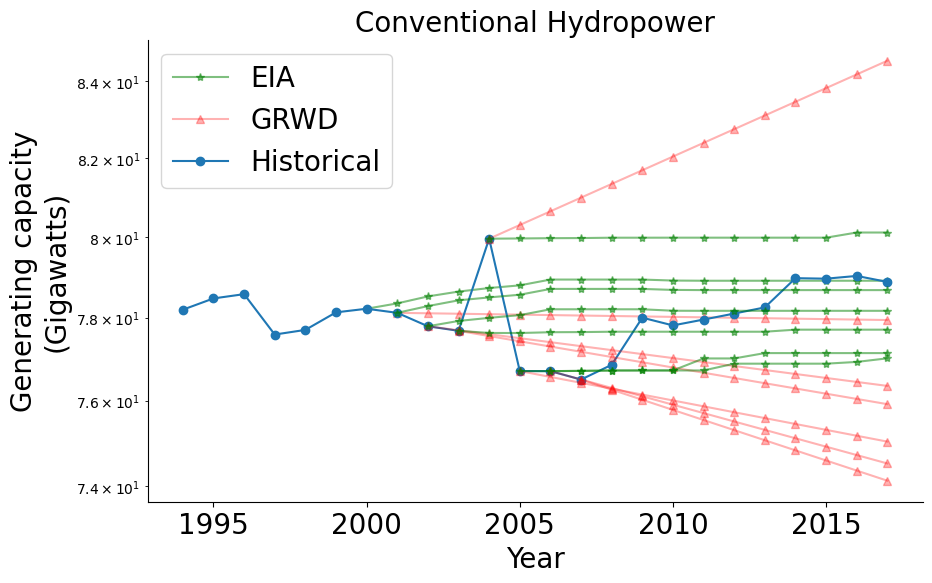

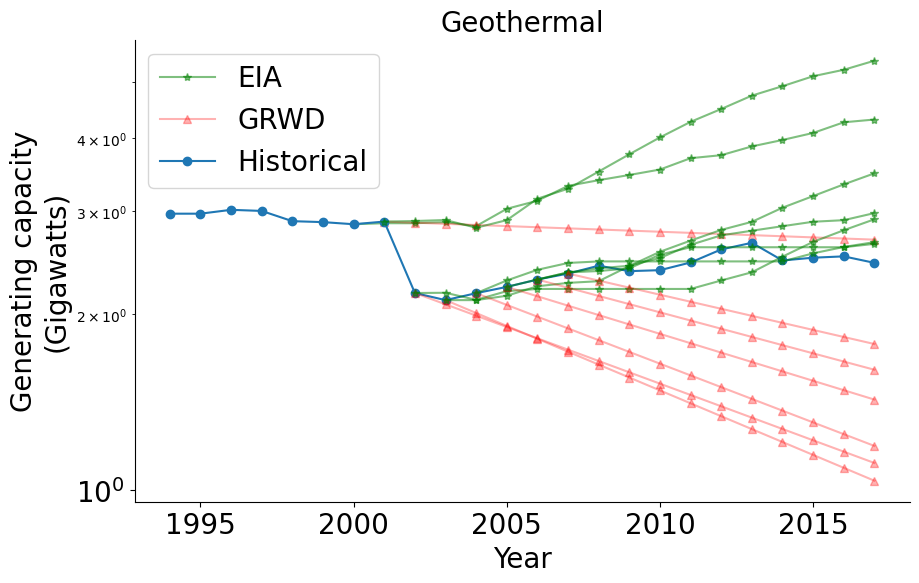

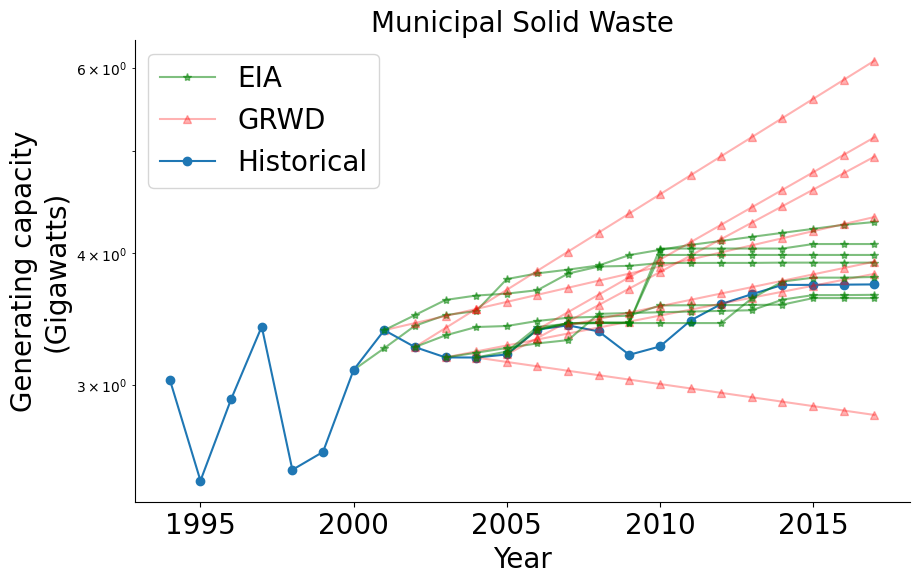

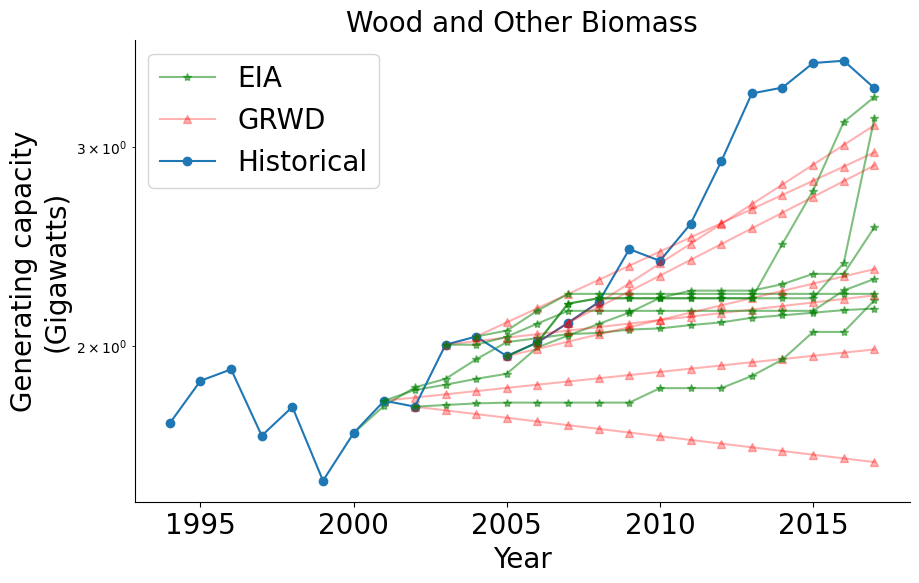

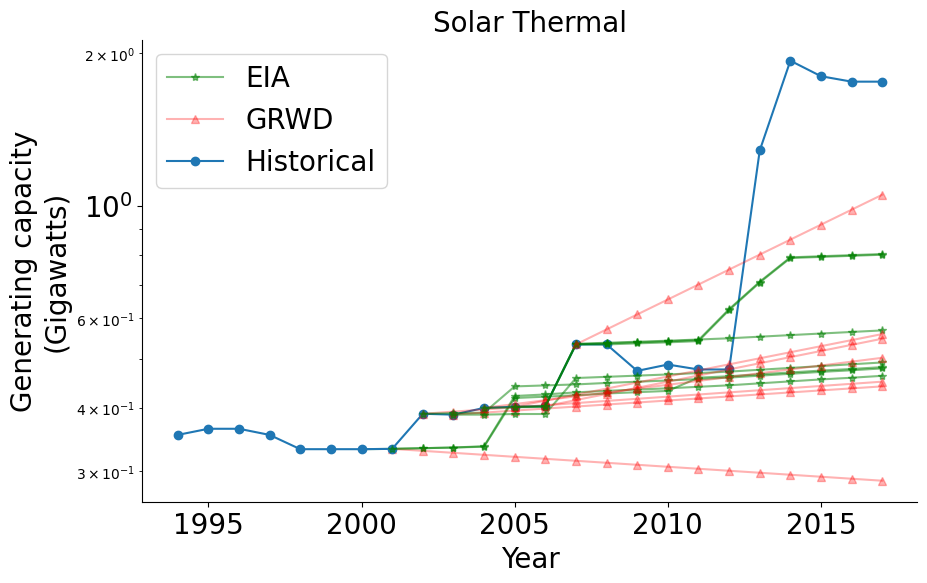

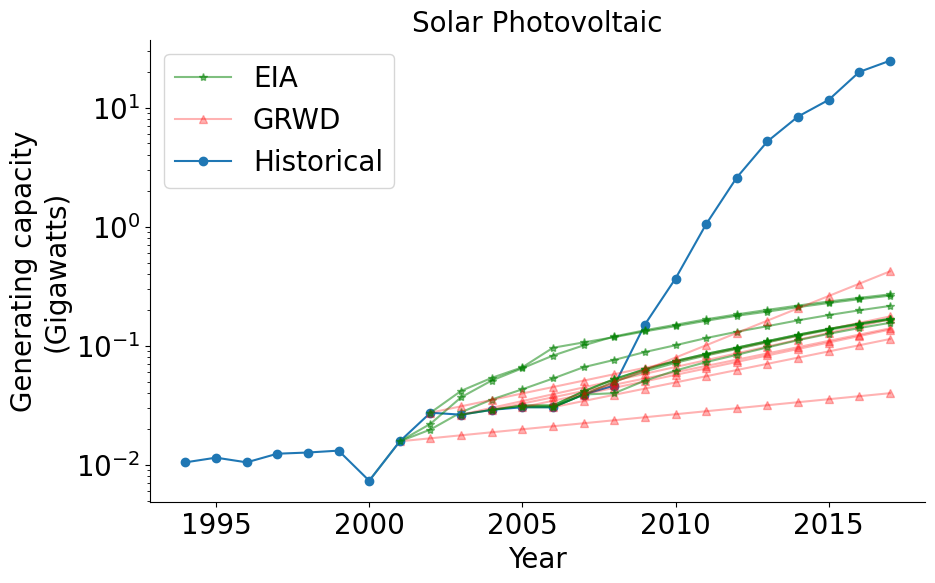

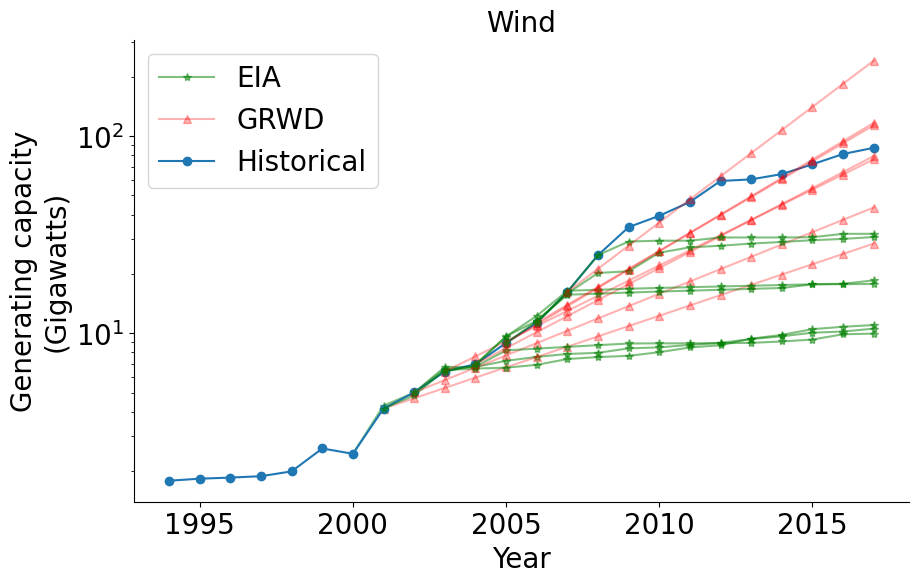

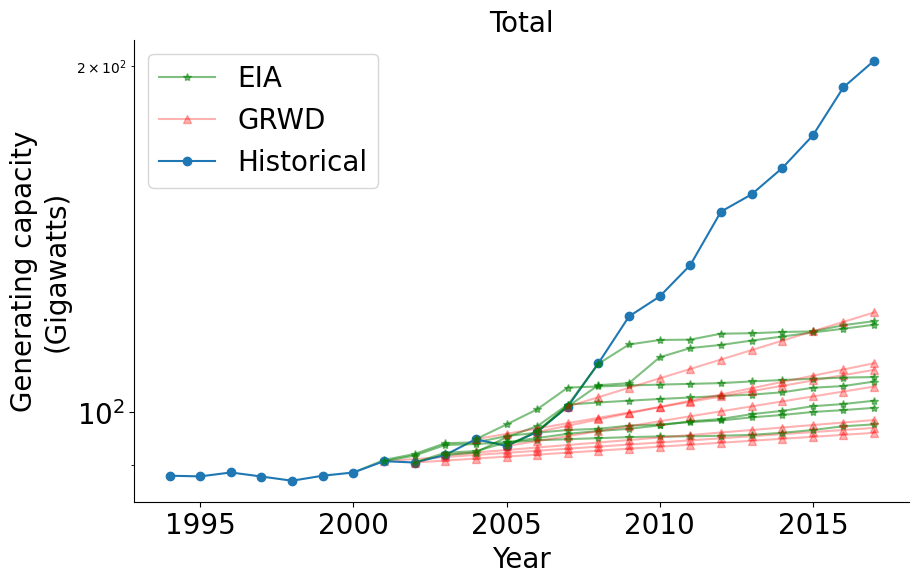

In [23]:
# Plot forecasts function
def plot_forecasts(name, df_hist, df_expert, df_grwd, m,
                   fig_forecast_path="fig/forecast/", f_name="_Both",
                   source="EPS_Cap", end_comparison=2017):
    """
    Plots expert and GRWD forecasts against historical data.

    Args:
        name (str): Technology name for plotting
        df_hist (DataFrame): Historical data
        df_expert (list): List of DataFrames for expert forecasts
        df_grwd (list): List of DataFrames for GRWD forecasts
        m (int): Number of points for differences
        fig_forecast_path (str): Path to save the plot
        f_name (str): File name suffix
        source (str): Source identifier
        end_comparison (int): Last year to compare

    Returns:
        None
    """
    n_points = len(df_grwd)
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot settings
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=fontsize_ticks)

    # Plot forecasts
    for i in range(n_points-1):
        if i == 0:
            ax.plot(df_expert[i + m - 2][name].loc[:end_comparison], "g*-", alpha=0.5, label="EIA")
            ax.plot(df_grwd[i][name], "r^-", alpha=0.3, label="GRWD")
            ax.plot(df_hist[name], "o-", label="Historical")
            ax.legend(fontsize=fontsize_legend)
        else:
            ax.plot(df_expert[i + m - 2][name].loc[:end_comparison], "g*-", alpha=0.5)
            ax.plot(df_grwd[i][name], "r^-", alpha=0.3)

    # Labels and title
    ax.set_xlabel("Year", fontsize=fontsize_axis)
    ax.set_ylabel("Generating capacity\n(Gigawatts)", fontsize=fontsize_axis)
    ax.set_yscale("log")
    ax.set_title(name, fontsize=fontsize_title)

    # # Save plot
    # fig.savefig(f"{fig_forecast_path}{source}_{name}{f_name}_M{m}_logscale.svg", bbox_inches='tight')
    # fig.savefig(f"{fig_forecast_path}{source}_{name}{f_name}_M{m}_logscale.png", bbox_inches='tight')
    # plt.show()

# Generate plots
for nm in df_histT.columns:
    plot_forecasts(nm, df_histT, df_expertT, df_grwdT, M,
                   fig_forecast_path=fig_forecast_path, f_name="_Both",
                   source=sec_proj, end_comparison=year_end_comparison)

print("Plots generated successfully.")

### **5. Visualizing Errors**

In this section, we focus on visualizing the errors between historical data and forecasts (from both experts and GRWD). These visualizations help us assess the accuracy of different forecasting methods and provide a deeper understanding of discrepancies over time and across technologies.

**What we'll be performing**

- **Loading error data**: Errors between historical data and forecasts (both expert and GRWD) are pre-computed using various metrics such as net log errors, percentage errors, and normalized errors (based on GRWD norms). These metrics provide a comprehensive assessment of forecast accuracy and variability. The error data is organized into separate files, making it easy to load and analyze for different renewable energy technologies and scenarios.

- **Plotting errors**: Visualizations are created to display error patterns for various renewable energy technologies. The technologies are grouped into two categories for clarity: Tech Group 1 includes Conventional Hydropower, Geothermal, Municipal Solid Waste, and Wood and Other Biomass, while Tech Group 2 includes Solar Thermal, Solar Photovoltaic, and Wind. Separate plots are generated for net log errors, percentage errors, and normalized errors, allowing for a detailed comparison of how these errors evolve over time and across technologies.

- **Analyzing averages**: To provide a broader perspective on forecast reliability, average errors are calculated and plotted for each technology. This includes both net errors and absolute errors, offering insights into the overall accuracy and variability of the forecasts. These averages help to identify consistent trends and systematic biases in both expert and GRWD predictions, facilitating a deeper understanding of the strengths and weaknesses of each forecasting approach.

#### **Key objectives**
- Evaluating the reliability of expert forecasts and GRWD predictions by visualizing their error patterns.
- Identifying systematic biases (e.g., over- or underprediction) in forecasting methods.
- Providing a foundation for exploring how forecast errors evolve across different renewable energy technologies and over time.


In [24]:
'''
plot_errors module visualizes errors from forecasts (expert and GRWD) against historical data.

Global variables:
    path (str): Path to historical data folder
    forecast_path (str): Path to forecasts folder
    errors_path (str): Path to error data
    fig_error_path (str): Path to save error plots
    sector (str): Source of forecasts (e.g., ElectricPower or End-Use Sector)
'''

# Global variables
path = 'AEOData/'
sector = "ElectricPower"
projection_of = "Capacity"
sec_proj = "EPS_Cap"
forecast_path = "results/forecast/"
errors_path = "results/errors/"
fig_error_path = "fig/errors/"

M = 5
year_first_data_point = 2000
year_last_data_point = 2017
year_first_report = 2003
year_last_report = 2017

In [25]:
# Load error data
error_files = {
    "errorNetLogExpert": sorted(glob.glob(f"{errors_path}{sec_proj}_ErrorNetLog_Expert*.csv")),
    "errorNetLogGRWD": sorted(glob.glob(f"{errors_path}{sec_proj}_ErrorNetLog_GRWD*M{M}.csv")),
}

In [26]:
# Load error data into DataFrames
def load_error_data(file_list):
    return [pd.read_csv(file, index_col=0) for file in file_list]

df_expertNetLog = load_error_data(error_files["errorNetLogExpert"])
df_grwdNetLog = load_error_data(error_files["errorNetLogGRWD"])

# Technologies for plotting
techs_1 = ["Conventional Hydropower", "Geothermal", "Municipal Solid Waste", "Wood and Other Biomass"]
techs_2 = ["Solar Thermal", "Solar Photovoltaic", "Wind"]

#### **Expected results**
Before diving into the visualizations, it is important to consider what the plots are expected to reveal and how they can be interpreted. The error trends for each technology will highlight deviations between historical data and forecasts, providing a comparative view of expert and GRWD predictions. These trends may expose systematic biases, such as consistent over- or underprediction, for specific technologies. Additionally, the average error plots, which include both mean and absolute errors, are expected to offer insights into the overall reliability and variability of the forecasts across all technologies. Together, these visualizations will serve as a critical tool for evaluating the accuracy and performance of different forecasting methods, while also uncovering areas where improvements may be needed.

In [27]:
def identity(x):
    return x

def squared(x):
    return x**2

import matplotlib.pyplot as plt

def plot_errors(names_list, df_error, alf=0.6, fig_error_path="fig/errors/",\
                source="EPS_Cap", name_fig="Error",\
                label_color_list=['ro', 'bs', 'g^', 'k*', 'mp'], xlims=None,
                ylims=None, title="Errors", y_lab="error"):
    '''
    Plots the errors vs forecast horizon
    Args:
        names_list(list of str): strings of technologies for which to do the plot
        df_error(DataFrame): pandas dataframe with the errors for each forecast horizon
        alf(float): transparency of points when plotting
        name_fig(str): name of figure to be exported
        label_color_list(list of str): color and marker of scatter plot
        xlims(list): plot x limit
        ylims(list): plot y limit
        title(str): title of the plot
        y_lab(str): plot y label
    '''
    # Initialize figure and axes with specified size
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed

    n_years = len(df_error)
    n_techs = len(names_list)
    for j in range(n_techs):
        name = names_list[j]
        for i in range(n_years):
            if i == 0:
                ax.plot(list(df_error[i].loc[:, name][:-1]), label_color_list[j], alpha=alf, label=name)
            else:
                ax.plot(list(df_error[i].loc[:, name][:-1]), label_color_list[j], alpha=alf)

    # Customize the axes
    ax.set_xlabel("Forecast horizon")
    ax.set_ylabel(y_lab)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_title(title)
    ax.grid()

    # Add the legend inside the plot
    ax.legend(loc='upper right', frameon=True)

    # Show or save the figure
    # fig.savefig(fig_error_path + source + "_" + name_fig + ".png", bbox_inches='tight')
    plt.show()

def make_av_err_forcast_hor(names_list, df_error, start=0, func=identity):
    '''
    Computes the average error for each forecast horizon
    Args:
        names_lis(list of str): strings of technologies for to compute the
                                average error
        df_error(DataFrame): pandas dataframe with the errors for each
                            forecast horizon
        start(int): from which horizon to start. start = 0 give first error 0

    Returns:
        df_(DataFrame): pandas dataframe with the average error for each forecast horizon
    '''
    n_forecast_hor = len(df_error[0].columns) #- start #-1 stands for the unname column
    n_years = len(df_error)
    n_techs = len(names_list)
    df_ = pd.DataFrame()

    for j in range(n_techs):
        name = names_list[j]
        for t in range(n_forecast_hor):
            list_val = []
            for i in range(n_years):
                try:  # errors since not all forecast horizons are met for all forecast years
                    if not np.isnan(df_error[i].loc[ : , name].iloc[t]):  # some NaN where full forecast horizon is not done
                        list_val.append(func(df_error[i].loc[ : , name].iloc[t]))
                except:
                    pass

            av_err = np.mean(list_val)
            df_.loc[name, t] = av_err  # direct assignment

    return df_

all_tech_markers =["co-", "m^-", "bp-", "gs-", "ro-", "ys-","k*-"]

def plot_average(df, markers=all_tech_markers, title="Average error", \
                 source="EPS_Cap", name_fig="AveErr", \
                 fig_error_path="fig/errors/", y_lab="average normed error"):
    '''
    Plots the average error for each forecast horizon
    Args:
        df(DataFrame): dataframe with errors for each forecast horizon
        markers(list(str)): list of markers
    '''
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed
    for i in range(len(df.index[:-1])):
        name = df.index[i]
        ax.plot(df.loc[name], markers[i], label=name)
    ax.legend(loc='upper left')  # Place the legend inside the plot
    ax.set_ylabel(y_lab)
    ax.set_xlabel("Forecast horizon")
    ax.set_title(title)
    # plt.savefig(fig_error_path + source + "_" + name_fig + ".png", \
    #             bbox_inches='tight')
    plt.show()


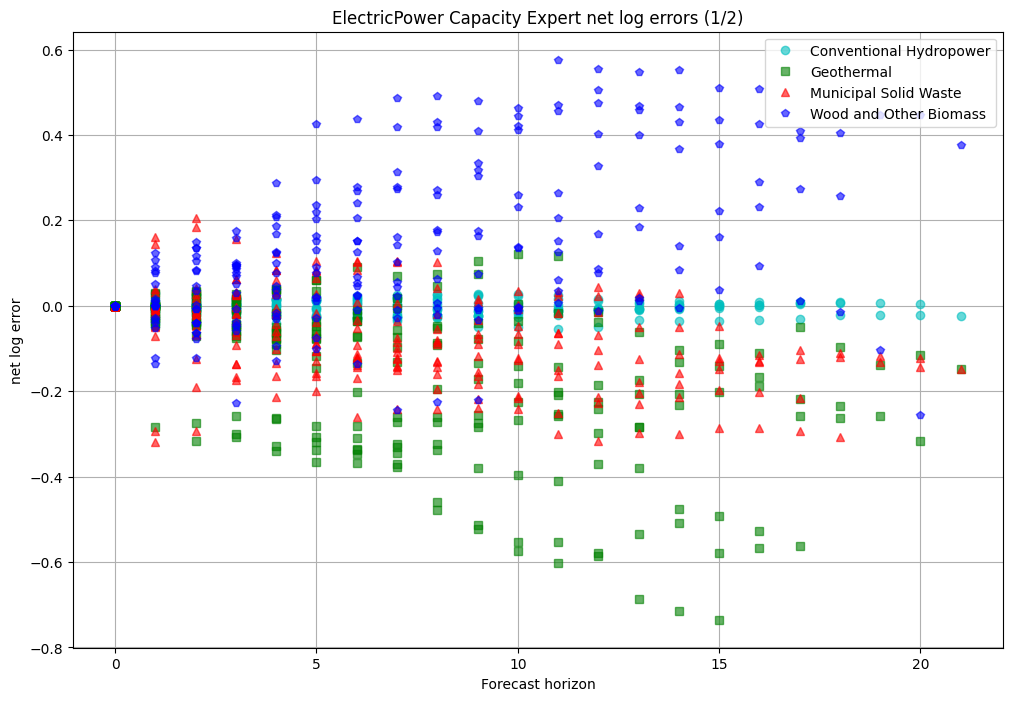

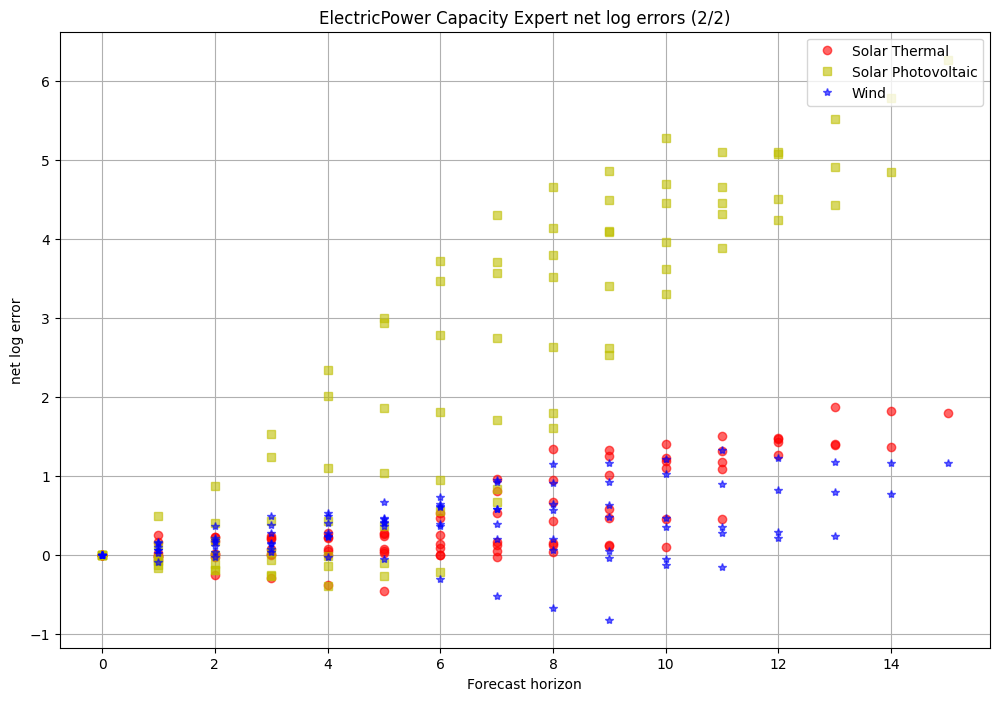

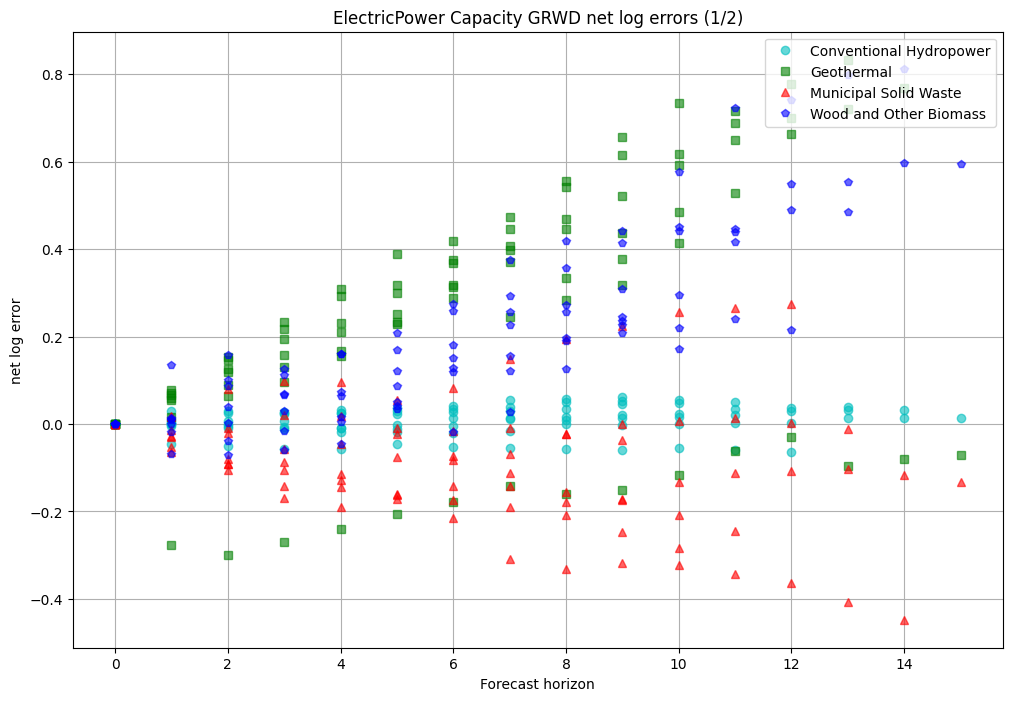

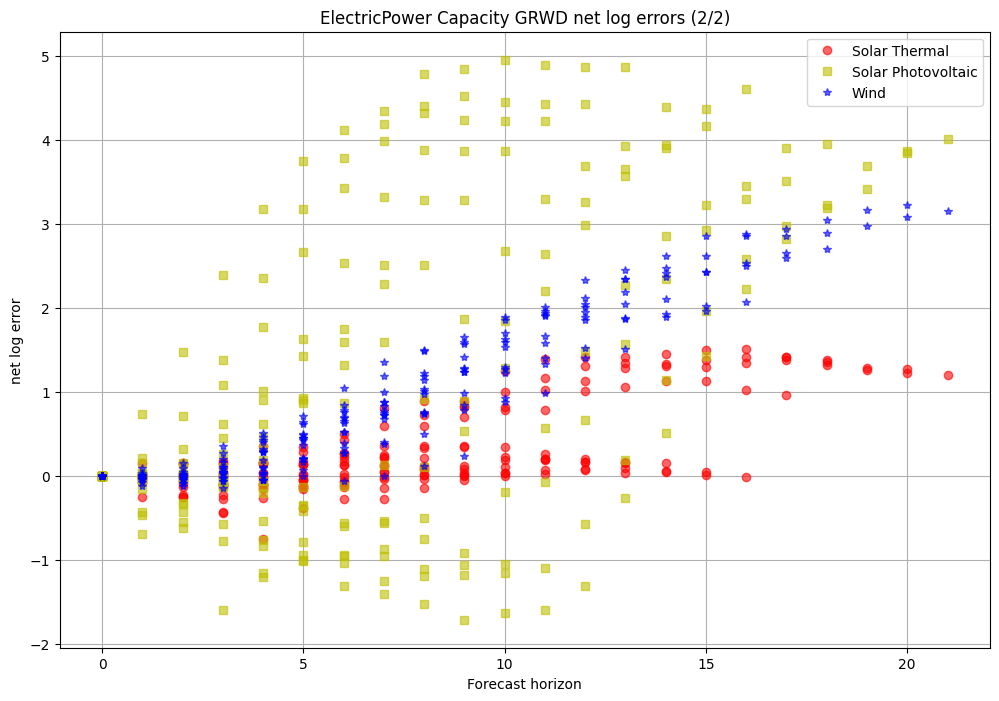

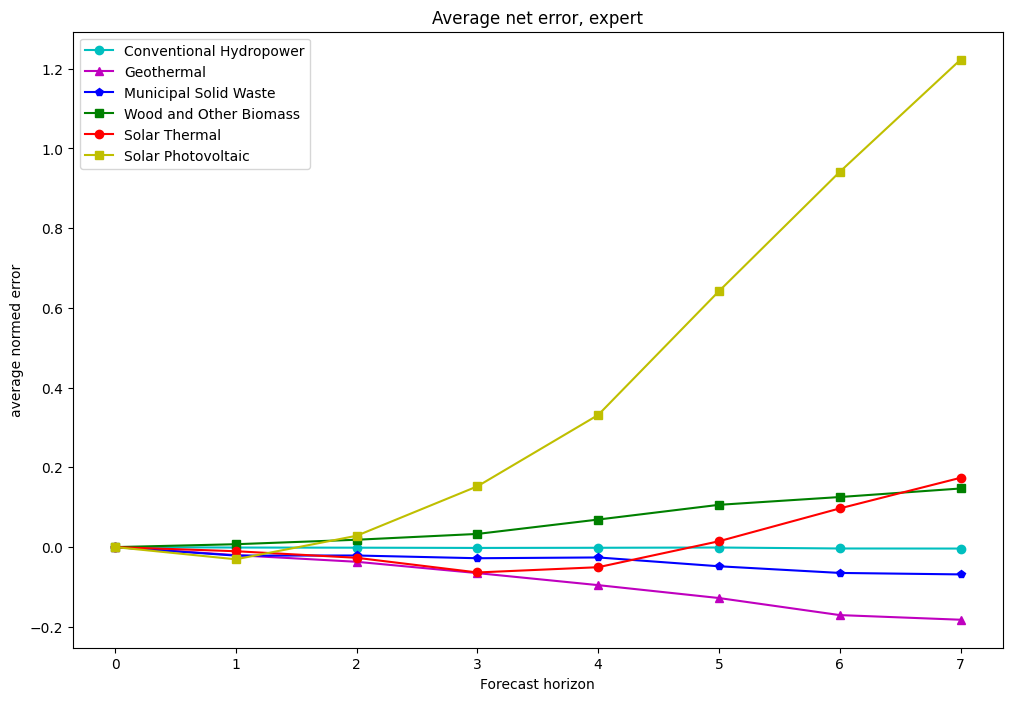

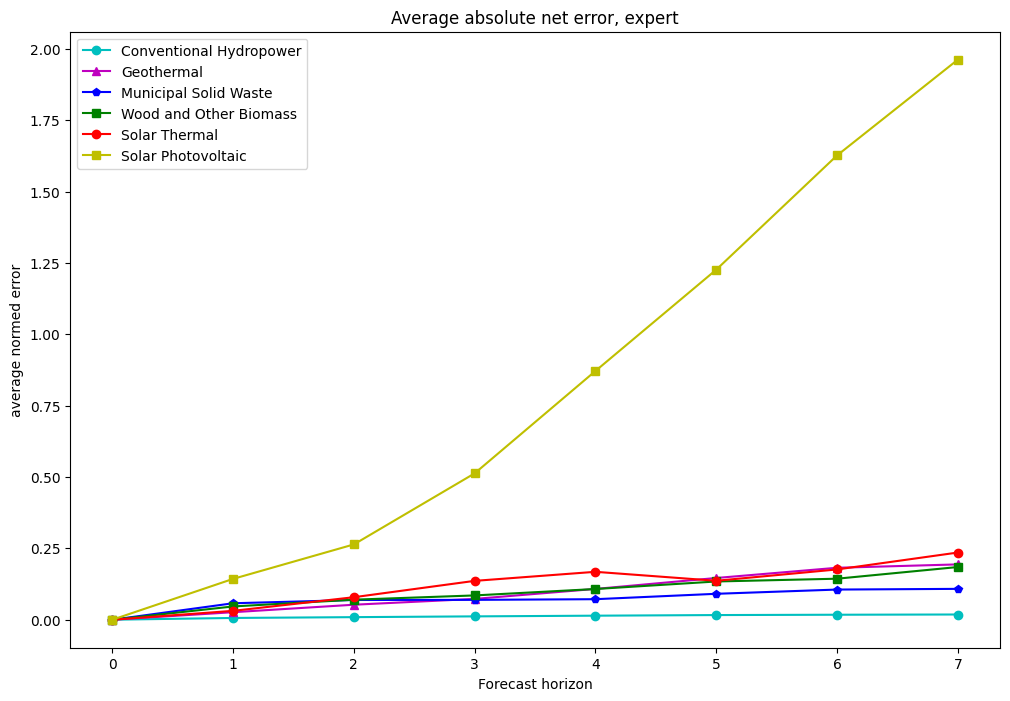

Error plots generated successfully.


In [28]:
# Plot expert errors
def plot_expert_errors():
    plot_errors(
        techs_1, df_expertNetLog, alf=0.6,
        fig_error_path=fig_error_path, source=sec_proj,
        name_fig="ErrorNetLog_Expert_1",
        label_color_list=['co', 'gs', 'r^', 'bp'],
        title=f"{sector} {projection_of} Expert net log errors (1/2)",
        y_lab="net log error"
    )
    plot_errors(
        techs_2, df_grwdNetLog, alf=0.6,
        fig_error_path=fig_error_path, source=sec_proj,
        name_fig="ErrorNetLog_Expert_2",
        label_color_list=['ro', 'ys', 'b*'],
        title=f"{sector} {projection_of} Expert net log errors (2/2)",
        y_lab="net log error"
    )
    plot_errors(
        techs_1, df_grwdNetLog, alf=0.6,
        fig_error_path=fig_error_path, source=sec_proj,
        name_fig="ErrorNetLog_GRWD_1",
        label_color_list=['co', 'gs', 'r^', 'bp'],
        title=f"{sector} {projection_of} GRWD net log errors (1/2)",
        y_lab="net log error"
    )
    plot_errors(
        techs_2, df_expertNetLog, alf=0.6,
        fig_error_path=fig_error_path, source=sec_proj,
        name_fig="ErrorNetLog_GRWD_2",
        label_color_list=['ro', 'ys', 'b*'],
        title=f"{sector} {projection_of} GRWD net log errors (2/2)",
        y_lab="net log error"
    )

# Plot averages
def plot_averages():
    df_ave_abs = make_av_err_forcast_hor(techs_1 + techs_2, df_expertNetLog, func=abs)
    df_ave = make_av_err_forcast_hor(techs_1 + techs_2, df_expertNetLog)

    plot_average(df_ave, title="Average net error, expert", name_fig="AveErrorNetLog_Expert")
    plot_average(df_ave_abs, title="Average absolute net error, expert", name_fig="AveAbsNetLog_Expert")

    # Maybe add in some code here to plot the cummulative errors for the GRWD?

# Generate all plots
plot_expert_errors()
plot_averages()

print("Error plots generated successfully.")

**Insights & discussions**

After coding and evaluating the Geometric Random Walk with Drift (GRWD) model, interpreting the results becomes essential. Comparing GRWD forecasts with EIA expert predictions often reveals valuable insights, such as GRWD outperforming experts for technologies like solar photovoltaics with consistent exponential growth. These findings underscore the strengths of data-driven models in capturing trends that experts may underestimate due to biases or unforeseen advancements. Students are encouraged to reflect on the broader implications of these results for renewable energy policy, investment strategies, and the future of energy modeling, while considering the variability in forecast accuracy across technologies and the challenges of modeling emerging innovations.

### **Concluding thoughts - Reflections on Renewable Energy Forecasting & Analysis**

This workshop provided a comprehensive exploration of renewable energy forecasting, focusing on the challenges and opportunities in understanding and evaluating expert predictions and baseline models like the **`Geometric Random Walk with Drift (GRWD)`**. By analyzing datasets, creating visualizations, and assessing forecast accuracy, students have gained a deeper understanding of forecasting methodologies and their real-world applications.

#### **Key highlights**
* **Introduction to renewable energy forecasting**: We began by understanding the role of renewable energy, particularly solar and wind, in shaping the energy landscape. Participants explored the basics of forecasting, the significance of historical data, and the challenges in making accurate predictions.

* **Data preparation**: Using the Annual Energy Outlook (AEO) datasets from the U.S. Energy Information Administration (EIA), we demonstrated how to organize and convert data for analysis. Students learned to handle `.xlsx` and `.csv` formats effectively, ensuring compatibility for Python-based analysis.

* **Forecast vs. reality analysis**: This section focused on comparing expert predictions with realized historical data. By plotting expert forecasts and GRWD predictions against actual trends, we identified patterns of underprediction, particularly for rapidly advancing technologies like solar photovoltaics and wind energy.

* **Geometric Random Walk with Drift (GRWD)**: Theoretical underpinnings of the GRWD model were explained, showcasing its role in renewable energy forecasting. GRWD served as a robust baseline model for assessing the accuracy and variability of expert predictions.

* **Error assessment & visualization**: Errors were calculated using metrics such as net log errors, percentage errors, and normalized GRWD errors. Visualizations highlighted discrepancies between forecasts and actual outcomes, emphasizing areas of improvement in predictive methodologies.

* **References & further exploration**:
    - [EIA data browser](https://www.eia.gov/electricity/data/browser/): Explore interactive electricity data by state, time period, and energy source.
    - Studies such as "*Looking the Wrong Way: Bias, Renewable Electricity, and Energy Modeling in the United States"* (Gilbert & Sovacool, 2016) and "*How Predictable Is Technological Progress?"* (Farmer & Lafond, 2016).

#### **Takeaways**
- Expert predictions vary significantly across technologies, with some being more predictable than others due to the nature of the time series.
- GRWD normalization allows for meaningful comparisons across different technologies and forecasting methods.
- Historical trends reveal consistent underprediction of renewable energy advancements, highlighting the importance of data-driven, objective forecasting approaches.

*By the end of this workshop, students have gained the tools and knowledge to critically evaluate energy forecasts, interpret trends, and contribute to the growing field of renewable energy analysis. As you continue your exploration, we encourage you to revisit the EIA's resources, including their [data browser](https://www.eia.gov/electricity/data/browser/), and delve deeper into the studies that frame the challenges and opportunities in this field.*